In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from dateutil.parser import parse 

In [11]:
df = pd.read_csv('data/train.csv', parse_dates=['local_time'], format='%H:%M:%S')
df.head()

TypeError: read_csv() got an unexpected keyword argument 'format'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        54330 non-null  int64         
 1   local_time      54330 non-null  datetime64[ns]
 2   country_code    54330 non-null  object        
 3   store_address   54330 non-null  int64         
 4   payment_status  54330 non-null  object        
 5   n_of_products   54330 non-null  int64         
 6   products_total  54330 non-null  float64       
 7   final_status    54330 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 3.3+ MB


In [26]:
groupdf= df.groupby(df['local_time'].dt.hour).count()['order_id'].sort_values(ascending=False)
groupdf.head()


local_time
20    6692
21    5494
19    4918
13    4445
14    3942
Name: order_id, dtype: int64

In [24]:
groupdf.values

array([38, 31, 26, ...,  1,  1,  1])

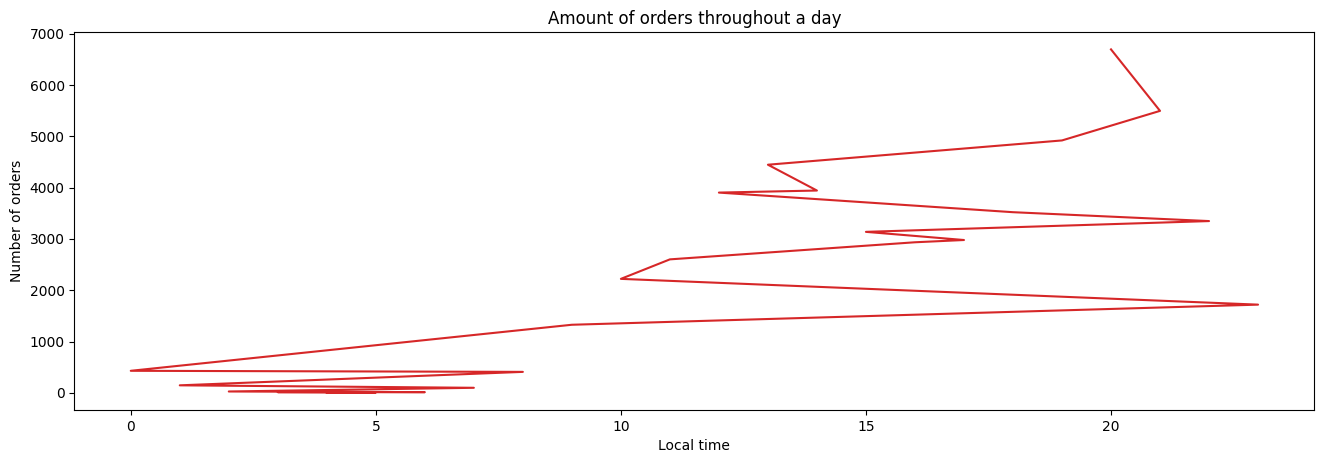

In [27]:
def plot_df(df, x, y, title="", xlabel='Local time', ylabel='Number of orders', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(groupdf, x=groupdf.index, y=groupdf.values, title='Amount of orders throughout a day')  